In [1]:
import numpy as np
import pandas as pd

#### Conjunto de Treino

In [2]:
train_file = "dataset/train.csv"
train = pd.read_csv(train_file)
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Conjunto de Teste

In [3]:
test_file = "dataset/test.csv"
test = pd.read_csv(test_file)
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Labels

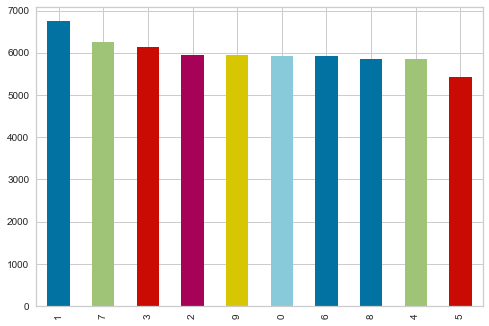

In [27]:
train[label_name].value_counts().plot(kind='bar')

In [28]:
x_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits

x_test = (test.iloc[:,1:].values).astype('float32') # all pixel values
y_test = test.iloc[:,0].values.astype('int32') # only labels i.e targets digits

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

('x_train shape:', (60000, 784))
('y_train shape:', (60000,))
('x_test shape:', (10000, 784))
('y_test shape:', (10000,))


In [29]:
import matplotlib.pyplot as plt
from PIL import Image
import scipy.misc
import random

def amostra_do_dataset(x_train, largura_img=12, altura_img=3, qnt_x=10, qnt_y=3):
    plt.figure(figsize=(largura_img, altura_img))
    x, y = qnt_x, qnt_y
    qnt_max = x*y
    for i in range(0, qnt_max):
        plt.axis("off")
        plt.subplot(y, x, i+1)
        image = Image.fromarray(x_train[random.randint(0, qnt_max)].reshape((28,28)))
        plt.imshow(image)
    plt.axis("off")    
    plt.show()
    plt.close()

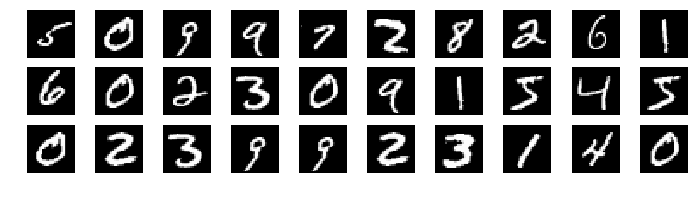

In [9]:
amostra_do_dataset(x_train)

In [15]:
#Normalize data
x_train = x_train/255.0
x_test = x_test/255.0

#### ROC Area under the curve

In [24]:
from yellowbrick.classifier import ROCAUC

# Instantiate the visualizer with the classification model multi class
def plot_rocauc(x_train, y_train, x_test, y_test, dic_labels, clf, titulo):
    visualizer = ROCAUC(clf, classes=dic_labels, title=titulo, size=(1080, 720))
    visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(x_test, y_test)  # Evaluate the model on the test data
    visualizer.poof()           # Draw/show/poof the data

In [17]:
from sklearn.metrics import roc_curve, auc

def curva_roc_classificador(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='red', lw=2, label='Curva ROC (Area = %0.5f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([-0.10, 1.10])
    plt.xlabel('Falsos Positivos')
    plt.ylabel('Verdadeiros Positivos')
    plt.title('Curva ROC (%s)' % 'name')
    plt.legend(loc="lower right")
    plt.show()
    plt.close()

#### Matriz de Confusao

In [18]:
import itertools

def plot_nice_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', 
                               cmap=plt.cm.YlOrRd, figure_dim=10):

    plt.figure(figsize=(figure_dim,figure_dim))
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Colocar mais um parametro
    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()    

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()

name Gauss Naive Bayes
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

   micro avg       0.56      0.56      0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



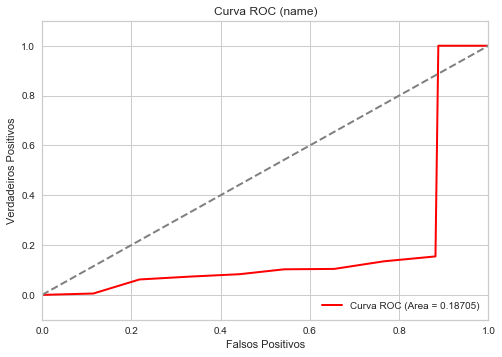

Normalized confusion matrix


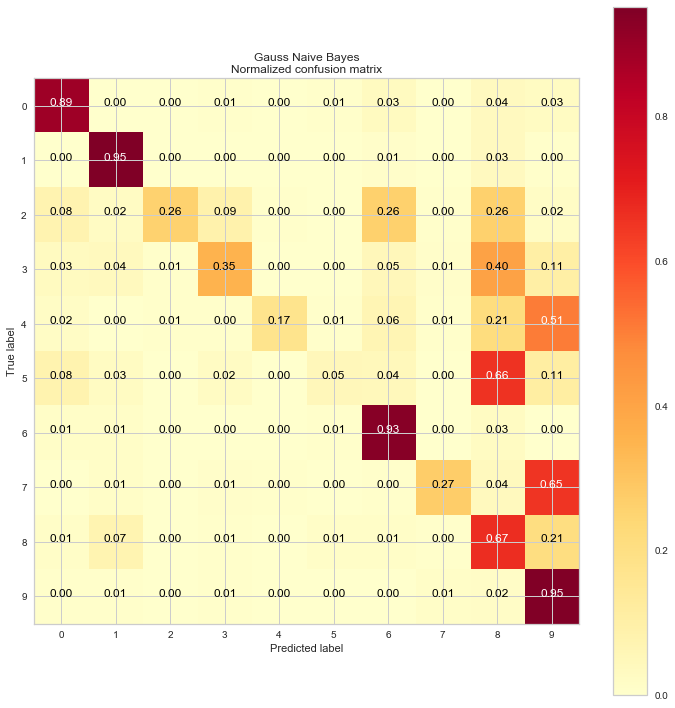

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

Classificadores = {
    "Gauss Naive Bayes": GaussianNB()
}

for name, classificador in Classificadores.items():
    print('name %s' % name)
    classificador.fit(x_train, y_train)
    score = classificador.score(x_test, y_test)
    y_score = classificador.predict(x_test)
    
    print(classification_report(y_test, y_score))
    
    fpr, tpr, _ = roc_curve(y_score, y_test, pos_label=1)
    curva_roc_classificador(fpr, tpr)
    
    cfm = confusion_matrix(y_test, y_score)
    plot_nice_confusion_matrix(cfm, classes=z_train.keys(), normalize=True,title=name+'\nNormalized confusion matrix')

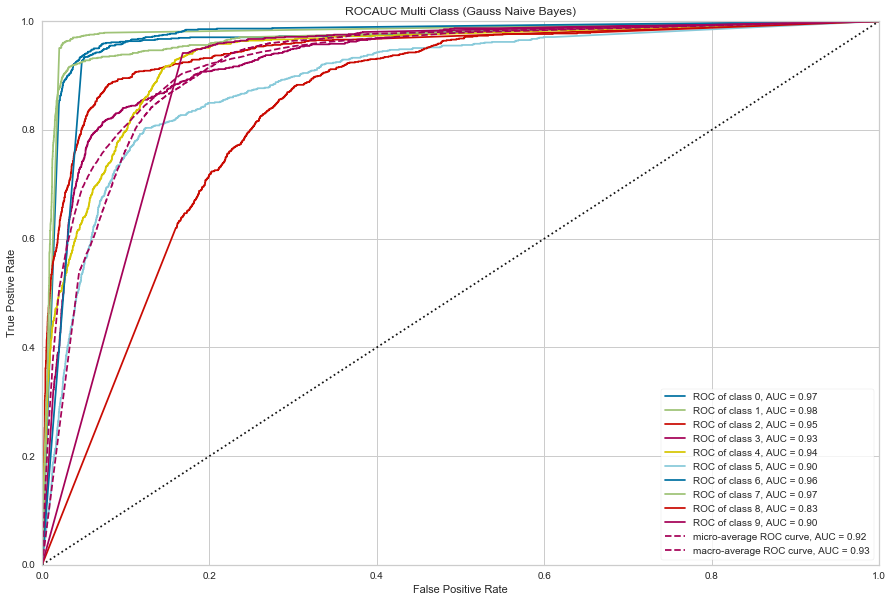

In [25]:
plot_rocauc(x_train, y_train, x_test, y_test, z_train.keys(), classificador, 'ROCAUC Multi Class (%s)' % name)